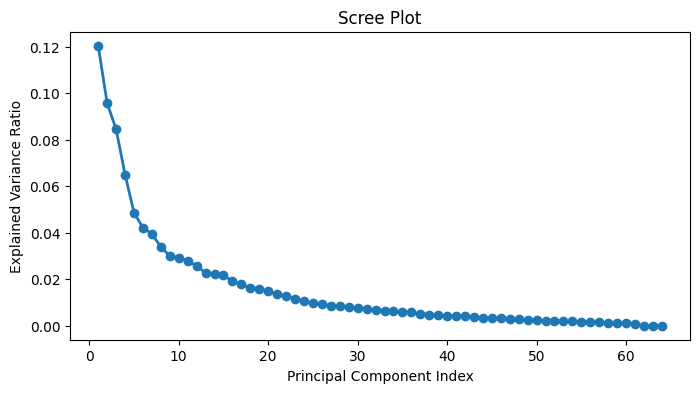

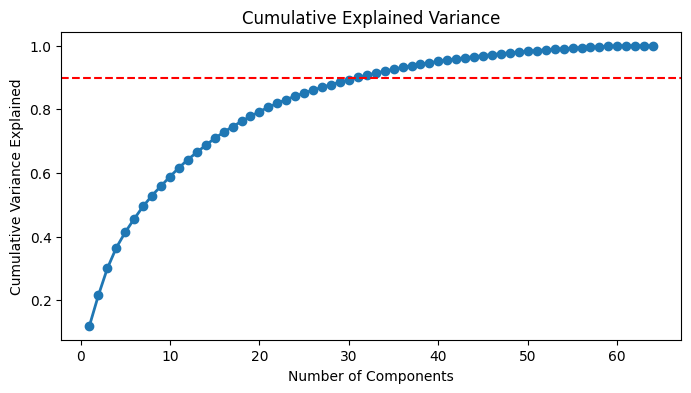

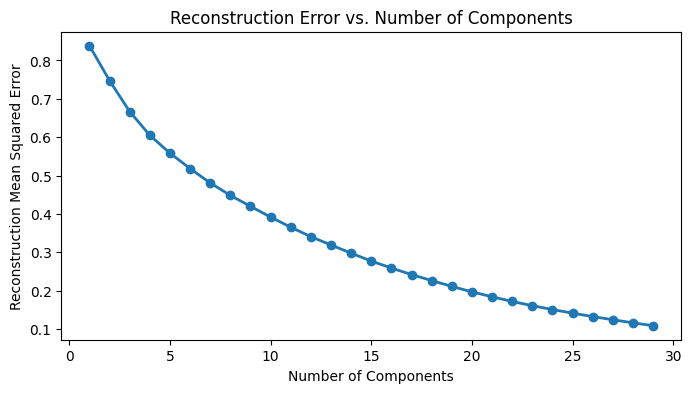

In [1]:
# PCA Component Selection: Python Demo with Scree Plot, Explained Variance, and Reconstruction

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler

# Load tabular data
digits = load_digits()
X = digits.data  # shape (n_samples, n_features)

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit PCA without reducing dimensions to get all principal components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Scree plot (variance explained per component)
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(explained_variance)+1), explained_variance, 'o-', linewidth=2)
plt.title("Scree Plot")
plt.xlabel("Principal Component Index")
plt.ylabel("Explained Variance Ratio")
plt.show()

# Cumulative variance plot
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, 'o-', linewidth=2)
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance Explained")
plt.axhline(0.90, color='red', linestyle='--')  # 90% line
plt.show()

# Reconstruction error for different numbers of components
reconstruction_errors = []
component_range = range(1, 30)

for k in component_range:
    pca_k = PCA(n_components=k)
    X_proj = pca_k.fit_transform(X_scaled)
    X_reconstructed = pca_k.inverse_transform(X_proj)
    error = np.mean((X_scaled - X_reconstructed) ** 2)
    reconstruction_errors.append(error)

plt.figure(figsize=(8, 4))
plt.plot(component_range, reconstruction_errors, 'o-', linewidth=2)
plt.title("Reconstruction Error vs. Number of Components")
plt.xlabel("Number of Components")
plt.ylabel("Reconstruction Mean Squared Error")
plt.show()

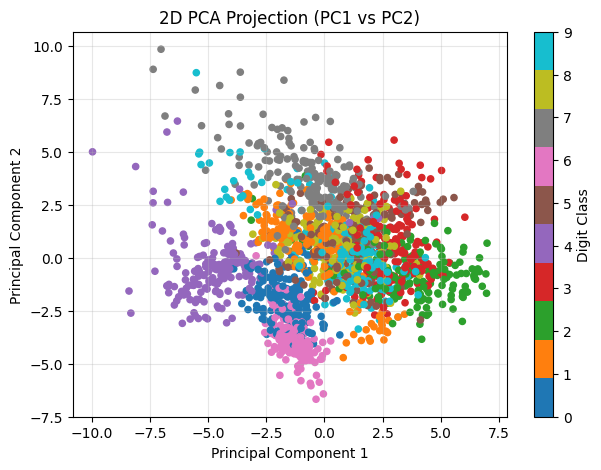

In [2]:

# Scatter Plot (PC1 vs PC2)

# Use first two principal components
pca_2 = PCA(n_components=2)
X_2d = pca_2.fit_transform(X_scaled)

plt.figure(figsize=(7, 5))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=digits.target, cmap='tab10', s=20)
plt.colorbar(label='Digit Class')
plt.title("2D PCA Projection (PC1 vs PC2)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True, alpha=0.3)
plt.show()


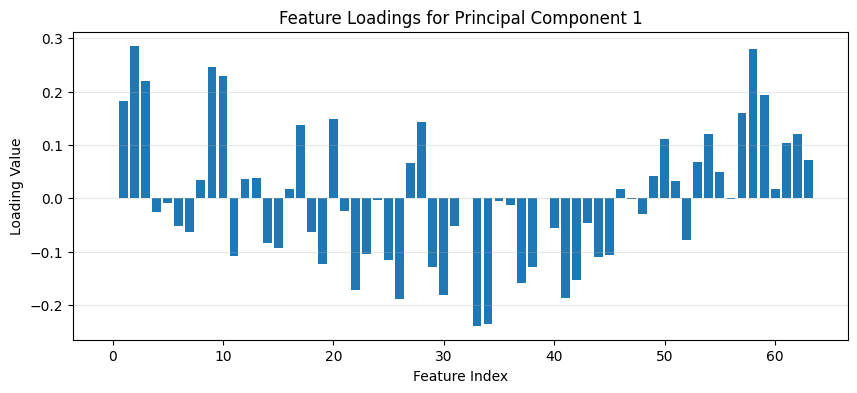

In [3]:
# Loading Scores Plot (Feature Contribution to PC1)

# PCA with full components to access loadings
pca_full = PCA()
pca_full.fit(X_scaled)

# Loadings: Each feature's contribution to each principal component
pc1_loadings = pca_full.components_[0]  # First principal component

plt.figure(figsize=(10, 4))
plt.bar(range(len(pc1_loadings)), pc1_loadings)
plt.title("Feature Loadings for Principal Component 1")
plt.xlabel("Feature Index")
plt.ylabel("Loading Value")
plt.grid(axis='y', alpha=0.3)
plt.show()
